# Residuals

\begin{equation} 
\hat{u}_i = Y_i - \hat{Y}_i
\end{equation}

In [15]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

salary = pd.read_csv(url, sep='\t')
salary.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [7]:
X = sm.add_constant(salary['Anos'])
Y = salary['Salario']

In [8]:
regression_result = sm.OLS(Y, X).fit()

In [9]:
salary['y_predicted'] = regression_result.predict()

salary.head()

,Anos,Salario,y_predicted
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594


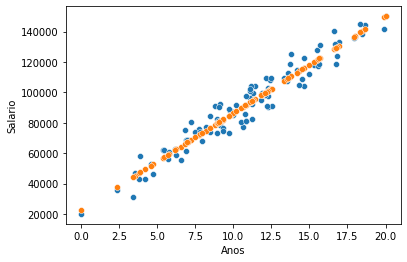

In [14]:
sns.scatterplot(data=salary, x='Anos', y='Salario')
sns.scatterplot(data=salary, x='Anos', y='y_predicted');

In [17]:
X_new = np.linspace(20,30,11)

X_new

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.])

In [18]:
X_new = sm.add_constant(X_new)

X_new

array([[ 1., 20.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 25.],
       [ 1., 26.],
       [ 1., 27.],
       [ 1., 28.],
       [ 1., 29.],
       [ 1., 30.]])

In [19]:
X_new_prediction = regression_result.predict(X_new)

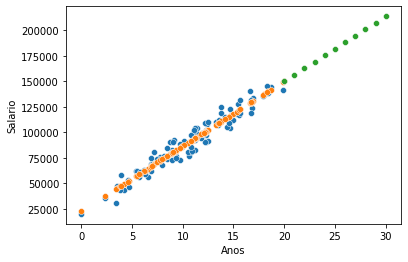

In [21]:
sns.scatterplot(data=salary, x='Anos', y='Salario')
sns.scatterplot(data=salary, x='Anos', y='y_predicted')
sns.scatterplot(x=X_new[:,1], y=X_new_prediction);

# Residuals

\begin{equation} 
\hat{u}_i = Y_i - \hat{Y}_i
\end{equation}

In [22]:
regression_result.resid

0     -2365.453231
1    -12063.380934
2     -2959.483285
3     11851.541534
4      1828.088369
          ...     
95     1257.825306
96     9793.446318
97    -1604.427152
98    10429.448692
99    -2656.801339
Length: 100, dtype: float64

In [23]:
salary['Residuals'] = regression_result.resid

Premise:

1. Mean equals to zero;

In [24]:
salary['Residuals'].mean()

1.7425918485969305e-11

Premise:
2. The $u$ values are independents

$u$ is the residuals

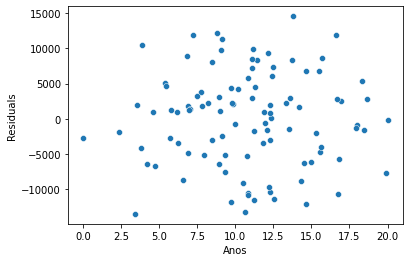

In [26]:
sns.scatterplot(x=salary['Anos'],
                y=salary['Residuals']);

- We can see that there is no pattern with the points

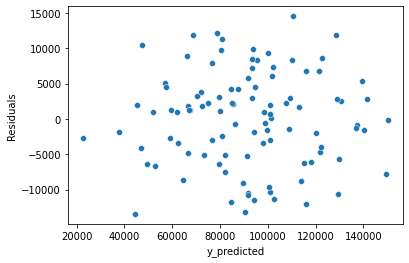

In [28]:
sns.scatterplot(x=salary['y_predicted'], 
                y=salary['Residuals']);

Premise:
3. $u$ variance is the same to all values of X;

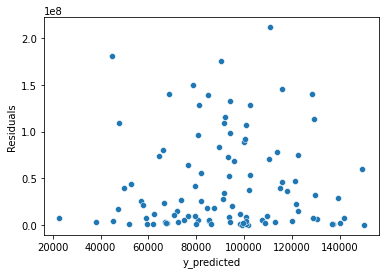

In [29]:
sns.scatterplot(x=salary['y_predicted'],
                y=salary['Residuals']**2);

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

## Determination Coefficient R²

How well the sample regression line fits the data.

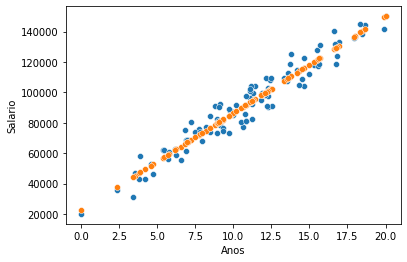

In [31]:
sns.scatterplot(data=salary, x='Anos', y='Salario')
sns.scatterplot(data=salary, x='Anos', y='y_predicted');

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

If the determination coefficient is close to one, it means that we have a line adjusted to our data

In [32]:
regression_result.rsquared

0.9417294727711081

That means that the line is 'explaining'/representing so well the data